**Fast AI** aren't just powerful in image problems. They also support tabular data which is the most common in machine learning. Let's see how it works with a built in example using deep learning techinque. Have fun!!

## The dataset

In [0]:
from fastai.tabular import *

Tabular data should be in a Pandas `DataFrame`.

In [0]:
path = untar_data(URLs.ADULT_SAMPLE)
df = pd.read_csv(path/'adult.csv')

In [0]:
dep_var = 'salary' ##the label
cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race'] ##category features(categorical names)
cont_names = ['age', 'fnlwgt', 'education-num'] ##numerical features(continuous names)
procs = [FillMissing, Categorify, Normalize]  #will be used to create a data bunch

In [15]:
df[dep_var] ##this column's name will turn into targert in the latter section automatically

0        >=50k
1        >=50k
2         <50k
3        >=50k
4         <50k
         ...  
32556    >=50k
32557     <50k
32558    >=50k
32559     <50k
32560     <50k
Name: salary, Length: 32561, dtype: object

In [0]:
test = TabularList.from_df(df.iloc[800:1000].copy(), path=path, cat_names=cat_names, cont_names=cont_names) ##create a test set

In [0]:
data = (TabularList.from_df(df, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs) ##creating a date bunch using a DataBlock api
                           .split_by_idx(list(range(800,1000)))
                           .label_from_df(cols=dep_var)
                           .add_test(test)
                           .databunch())

In [6]:
data.show_batch(rows=10)

workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,target
Private,Some-college,Never-married,Craft-repair,Own-child,White,False,-0.1896,-0.1291,-0.0312,<50k
Private,Some-college,Widowed,Other-service,Not-in-family,White,False,1.7161,0.0298,-0.0312,<50k
Private,HS-grad,Married-civ-spouse,Transport-moving,Husband,White,False,-0.2629,0.3154,-0.4224,<50k
Private,10th,Married-civ-spouse,Craft-repair,Husband,White,False,1.3496,-0.0834,-1.5958,<50k
Private,Doctorate,Married-civ-spouse,Prof-specialty,Husband,White,False,2.1559,0.0374,2.3157,>=50k
Private,Doctorate,Married-civ-spouse,Prof-specialty,Husband,White,False,0.0303,0.1404,2.3157,>=50k
Private,HS-grad,Never-married,Other-service,Own-child,White,False,-1.5090,-0.1138,-0.4224,<50k
Self-emp-inc,Some-college,Never-married,Adm-clerical,Own-child,White,False,-1.3624,-0.8085,-0.0312,<50k
Private,10th,Married-civ-spouse,Machine-op-inspct,Wife,White,False,-1.2158,0.2371,-1.5958,<50k
Private,HS-grad,Never-married,Craft-repair,Own-child,White,False,-1.1425,0.0727,-0.4224,<50k


## Training the model

In [0]:
learn = tabular_learner(data, layers=[200,100], metrics=accuracy)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


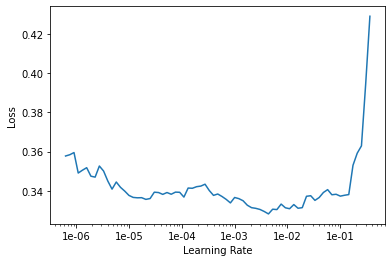

In [19]:
learn.lr_find()
learn.recorder.plot()

In [16]:
learn.fit(10, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.355709,0.380695,0.820000,00:04
1,0.346115,0.393154,0.825000,00:04
2,0.359647,0.374653,0.815000,00:04
3,0.350277,0.363792,0.840000,00:04
4,0.363178,0.350842,0.840000,00:04
5,0.357109,0.358441,0.860000,00:04
6,0.351524,0.351139,0.850000,00:04
7,0.347493,0.349965,0.840000,00:04
8,0.352622,0.336018,0.860000,00:04
9,0.352846,0.355578,0.835000,00:04


In [0]:
learn.unfreeze() #notice here unfreeze will do nothing because there aren't enough layers

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


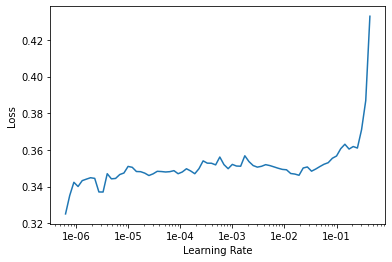

In [21]:
learn.lr_find()
learn.recorder.plot()

In [23]:
learn.fit(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.348501,0.340238,0.845000,00:04


In [24]:
learn.fit(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.352546,0.337688,0.860000,00:04


In [0]:
learn.save('final')

## Prediction

In [0]:
row = df.iloc[1000][:-1]

In [32]:
row

age                                44
workclass                   Local-gov
fnlwgt                         262241
education                     HS-grad
education-num                       9
marital-status     Married-civ-spouse
occupation               Adm-clerical
relationship           Other-relative
race                            White
sex                            Female
capital-gain                        0
capital-loss                        0
hours-per-week                     40
native-country          United-States
Name: 1000, dtype: object

In [0]:
prediction,  b, c= learn.predict(row) 

In [34]:
print('The person(adult) is more likely to make:', prediction)

The person(adult) is more likely to make: <50k
